In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.linalg import eigvals, solve
from matplotlib.ticker import MultipleLocator

In [8]:
tol = 1e-5

# Problem 1
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

evs = eigvals(A)
p = max(abs(evs))
print(p)

0.965538166352


Since the largest eigenvalue is less than 1, then the equation $x = Ax + b$
has a unique solution since the matrix $I-A$ is invertible.

In [9]:
# Matrix Algebra
def mat_alg(A, b):
    A_inv = np.linalg.inv(A)
    return np.dot(A_inv,b)

# Successive Approximations
x_0 = np.array([[10],[10],[1]])
def suc_approx(A, b, x_init, tol):
    err = 100
    x_old = x_init
    while err > tol:
        x_new = np.dot(A,x_old) + b
        x_diff = np.square(x_old-x_new)
        err = sqrt(np.sum(x_diff))
        x_old = x_new
        #print (x_old)
    return x_new

print("Matrix Algebra:", mat_alg(np.eye(3)-A, b).T)
print("Successive Approximation:", suc_approx(A, b, x_0, tol).T)

Matrix Algebra: [[ -0.89552239  13.34328358  45.64179104]]
Successive Approximation: [[ -0.89550865  13.34328105  45.6417566 ]]


Problem 2

Let T be the linear operator for the equation:
$$Tx = c(1-\beta) + \beta\sum_{k=1}^K \max\{w_k,x\}p_k$$
Therefore, $T$ maps $\mathbb R_+$ to $\mathbb R_+$ since $c >0$ and $0 < \beta < 1$.
We will show that there exists a unique fixed point by using the contraction mapping
theorem in the metric space $(\mathbb R_+, d)$ where $d$ is the standard Euclidean norm.
1. Note that $Tx$ is in $\mathbb R_+$ if $x \in \mathbb R_+$.
2. $(\mathbb R_+, d)$ is a complete metric space since it is a Euclidean space (of nonnegative numbers) with the standard norm.
3. If $x,y \in \mathbb R_+$ then we have that

$
\begin{align*}
|Tx - Ty| &= \beta|\sum_{k=1}^K \max\{w_k,x\}p_k - \sum_{k=1}^K \max\{w_k,y\}p_k| \\
          &= \beta|\sum_{k=1}^K p_k \max\{w_k,x\} - \max\{w_k,y\}| \\
          &\leq \beta\sum_{k=1}^K |p_k \max\{w_k,x\} - \max\{w_k,y\}| \\
          &= \beta\sum_{k=1}^K |p_k||\max\{w_k,x\} - \max\{w_k,y\}| \\
          &\leq \beta\sum_{k=1}^K |p_k||x-y| \\
          &= \beta|x-y|\sum_{k=1}^K|p_k| \\
          &= \beta|x-y|
\end{align*}
$

Since $0 < \beta < 1$, then $T$ is a contraction mapping. Therefore, there exists a unique solution
that solves the equation due to the contraction mapping theorem.

A strategy for computing the problem is by choosing any initial starting point $x$ and
successively iterating as in the first exercise since the iteration will converge
to the fixed point since $T$ is a contraction mapping in a complete metric space.

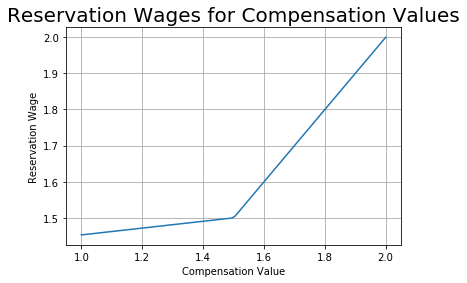

<function matplotlib.pyplot.close>

In [11]:
# Problem 3
beta = 0.96
wages = np.array([0.5,1.0,1.5])
probs = np.array([0.2,0.4,0.4])
c_vals = np.linspace(1,2,100)

def w_reserv(wages, probs, beta, c_vals, tol):
    w_r = np.ones_like(c_vals)
    for i in range(len(c_vals)):
        err = 100
        w_old = w_r
        while err > tol:
            sum_part = 0
            for j in range(len(wages)):
                sum_part = sum_part + max((w_old[i],wages[j]))*probs[j]
            w_new = c_vals[i]*(1-beta) + beta*sum_part
            err = w_new - w_old[i]
            w_old[i] = w_new
        w_r[i] = w_old[i]
    return w_r

fig, ax = plt.subplots()
plt.plot(c_vals, w_reserv(wages, probs, beta, c_vals, tol))
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Reservation Wages for Compensation Values', fontsize=20)
plt.xlabel('Compensation Value')
plt.ylabel('Reservation Wage')
plt.savefig('reservation_wage.png')
plt.show()
plt.close
